In [1]:
####### Run a simple analysis of terrain around a selected location

# Step 1: Sign up for a Google Earth Engine Account here:
# https://earthengine.google.com/signup/

# you will use this to authenticate your account with GEE to run the script and
# utilize GEE layers

In [ ]:
# get any missing modules
! pip install earthengine-api geemap pandas

In [3]:
# setup modules
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys,os,os.path,tempfile

# spatial modules
import ee
#import geemap # currently not using as colorbars dont load properly in google collab
import geemap.colormaps as cm
import geemap.foliumap as geemap # use folium instead so coloramps work on goolge collab
# https://geemap.org/notebooks/geemap_and_folium/

# disable after updating
#geemap.update_package()

In [4]:
## setup output. defined dir or system temp dir
data_dir=os.path.expanduser(os.path.join(tempfile.gettempdir(),'uas_output'))

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

print(" ")
print("****** Raster and blockage results output folder ******")
print("****** Note: In Google Collab, use the dir navigation tool on the left of the screen ******")
print("****** Use the dir navigation to go up one level, then navigate to tmp/geo ******")
print(data_dir)

 
****** Raster and blockage results output folder ******
****** Note: In Google Collab, use the dir navigation tool on the left of the screen ******
****** Use the dir navigation to go up one level, then navigate to tmp/geo ******
/var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output


In [5]:
##### initialize ee API  - you need to authenticate with GEE and initialize

## Trigger the authentication flow. You only need to do this once while running notebook
ee.Authenticate()

## After inserting the API key initialize GEE
ee.Initialize()

In [6]:
### get COGS image files
# https://blog.gishub.org/gee-tutorial-38-how-to-use-cloud-optimized-geotiff-with-earth-engine
URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Kougarok_20180725_Flight6_RGB_cog.tif'
kg_rgb_image = geemap.load_GeoTIFF(URL)
RGB_imageVisParam = {"opacity":1,"bands":["B0","B1","B2"],
                    "min":-4.063213446967957,"max":85.22120105681381,
                     "gamma":1};

URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Kougarok_20180725_Flight6_CHM_cog.tif'
kg_chm_image = geemap.load_GeoTIFF(URL)
kg_chm_image = kg_chm_image.select('B0').multiply(0.01)
chm_mask = kg_chm_image.gt(0);
chm_uas_image_masked = kg_chm_image.updateMask(chm_mask);
#print(kg_chm_image.getInfo())
print('CHM Info', kg_chm_image.getInfo()['bands'])
dem_palette = cm.get_palette('Spectral_r', n_class=30)
demViz = {'min': 0.0, 'max': 2.0, 'palette': dem_palette, 'opacity': 1}

URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Kougarok_20180725_Flight6_TIR_cog.tif'
kg_tir_image = geemap.load_GeoTIFF(URL)
kg_tir_image = kg_tir_image.select('B0').multiply(0.1)
tir_mask = kg_tir_image.gt(0);
tir_uas_image_masked = kg_tir_image.updateMask(tir_mask);
tir_palette = cm.get_palette('Spectral_r', n_class=30)
tirViz = {'min': 15, 'max': 30, 'palette': tir_palette, 'opacity': 1}

CHM Info [{'id': 'B0', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [22850, 14148], 'crs': 'EPSG:32603', 'crs_transform': [0.01, 0, 508169.23, 0, -0.010000000000031596, 7226835.705]}]


In [7]:
# center map over Kougarok
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map

In [8]:
# center map over Kougarok
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')
uas_map.add_colorbar(colors=demViz['palette'], vmin=demViz['min'], 
                     vmax=demViz['max'], label="SfM CHM (meters)", 
                     caption = "SfM CHM (meters)",
                     layer_name="SfM CHM (meters)", position="bottomright")
uas_map

In [9]:
### TIR map
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(tir_uas_image_masked, tirViz, 'UAS_Kougarok_20180725_Flight6_TIR')
#uas_map.add_colorbar(tirViz, label="LST (deg C)", 
#                  layer_name="LST", position="bottomright")
uas_map.add_colorbar(colors=tirViz['palette'], vmin=tirViz['min'], 
                     vmax=tirViz['max'], label="LST (deg C)", 
                     caption = "LST (deg C)",
                     layer_name="LST (deg C)", position="bottomright")
uas_map.addLayerControl()
uas_map

In [10]:
### Combined map

# center map over Kougarok
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=18);
uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')
uas_map.add_colorbar(colors=demViz['palette'], vmin=demViz['min'], 
                     vmax=demViz['max'], label="SfM CHM (meters)", 
                     caption = "SfM CHM (meters)",
                     layer_name="SfM CHM (meters)", position="bottomright")
uas_map.addLayer(tir_uas_image_masked, tirViz, 'UAS_Kougarok_20180725_Flight6_TIR')
uas_map.add_colorbar(colors=tirViz['palette'], vmin=tirViz['min'], 
                     vmax=tirViz['max'], label="LST (deg C)", 
                     caption = "LST (deg C)",
                     layer_name="LST (deg C)", position="bottomright")
uas_map

In [11]:
### Combining UAS and other datasets - in this case WMS datasets
#uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=14);

#elev_url = 'https://elevation.nationalmap.gov/arcgis/services/3DEPElevation/ImageServer/WMSServer?'
#uas_map.add_wms_layer(url=elev_url, layers='3DEPElevation:None', name='3DEP Elevation', shown=True)

#naip_url = 'https://services.nationalmap.gov/arcgis/services/USGSNAIPImagery/ImageServer/WMSServer?'
#uas_map.add_wms_layer(url=naip_url, layers='0', name='NAIP Imagery', format='image/png', shown=True)


#uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')

#uas_map.addLayerControl()
#uas_map

In [12]:
### Combining UAS and other datasets - in this case GEE datasets
elev_dataset = ee.Image('UMN/PGC/ArcticDEM/V3/2m_mosaic')
# https://developers.google.com/earth-engine/datasets/catalog/UMN_PGC_ArcticDEM_V3_2m_mosaic
ned_elevation = elev_dataset.select('elevation')
dem_palette = cm.get_palette('Spectral_r', n_class=30)
demViz2 = {'min': 0.0, 'max': 150, 'palette': dem_palette, 'opacity': 1}

# Global Forest Canopy Height (2005)
gfch = ee.Image('NASA/JPL/global_forest_canopy_height_2005');
forestCanopyHeight = gfch.select('1');
gfch_palette = cm.get_palette('Spectral_r', n_class=30)
gfchViz = {'min': 0.0, 'max': 40.0, 'palette': gfch_palette, 'opacity': 1}


uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=15);
uas_map.addLayer(forestCanopyHeight, gfchViz, 'Global Forest Canopy Height (2005, in meters)')
uas_map.add_colorbar(colors=gfchViz['palette'], vmin=gfchViz['min'], vmax=gfchViz['max'],
                     label='Global Forest Canopy Height (2005, in meters)', 
                     layer_name='Global Forest Canopy Height', 
                     caption = 'Global Forest Canopy Height (2005, in meters)',
                     position='bottomright', orientation='vertical')
uas_map.addLayer(ned_elevation, demViz2, 'Elevation above sea level');
uas_map.add_colorbar(colors=demViz2['palette'], vmin=demViz2['min'], 
                     vmax=demViz2['max'], label="Elevation (m)", 
                     caption = "Elevation (m)", 
                     layer_name="ArcticDEM", position="bottomright")


uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map

In [13]:
### Extract random points through CHM layer
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')

region = ee.Geometry.Point([-164.8239, 65.1644]).buffer(30)
uas_map.addLayer(ee.Image().paint(region, 0, 4), {'palette': 'yellow'}, "ROI-1")

random_points = geemap.random_sampling(chm_uas_image_masked, region, numPixels=100)
uas_map.addLayer(random_points, {}, "Random Sampling")

uas_map

In [14]:
### Show results of random sampling (x100)
df = geemap.ee_to_pandas(random_points)
print("SfM CHM in meters", df)

SfM CHM in meters           B0
0   0.840782
1   0.076782
2   0.053627
3   0.375153
4   0.225601
..       ...
95  0.251045
96  0.003738
97  0.390968
98  1.191360
99  0.715347

[100 rows x 1 columns]


In [15]:
### Plot spectra data


In [16]:
### Open spectrometer data
pt_refl_data = pd.read_csv('https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Kougarok_20180725_Flight6_Spectra.csv')
pt_refl_data

,Site,Data_Acquisition_Date_UTC,Data_Acquisition_Time_UTC,Longitude_DD,Latitude_DD,Altitude_HAE_Meter,Heading_DD,Yaw_DD,Pitch_DD,Roll_DD,...,Wave_891,Wave_892,Wave_893,Wave_894,Wave_895,Wave_896,Wave_897,Wave_898,Wave_899,Wave_900
0,Seward_Kougarok,20180726,03:27:56.268,-164.825088,65.164664,131.66,65,1.140528,-0.004233,0.114135,...,0.311924,0.327072,0.338234,0.342164,0.337681,0.336077,0.333159,0.328294,0.322149,0.315760
1,Seward_Kougarok,20180726,03:27:58.044,-164.824922,65.164676,131.30,55,0.966609,-0.036548,0.048309,...,0.559171,0.555543,0.548017,0.540087,0.541379,0.548451,0.558910,0.572942,0.591219,0.613979
2,Seward_Kougarok,20180726,03:27:59.654,-164.824718,65.164675,131.19,63,1.115932,-0.008796,0.024185,...,0.524475,0.532793,0.543658,0.555777,0.566562,0.570470,0.568602,0.561128,0.547815,0.528307
3,Seward_Kougarok,20180726,03:28:01.072,-164.824565,65.164669,131.45,82,1.420872,0.007642,0.018258,...,0.452900,0.463432,0.474325,0.487582,0.494661,0.499358,0.501391,0.500863,0.498027,0.493050
4,Seward_Kougarok,20180726,03:28:02.461,-164.824387,65.164658,131.56,97,1.731862,-0.006768,0.018213,...,0.378744,0.385791,0.388877,0.392831,0.399724,0.405420,0.408541,0.409678,0.409419,0.407934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Seward_Kougarok,20180726,03:32:47.062,-164.824341,65.164068,131.23,200,-2.793805,-0.048716,0.194516,...,0.516380,0.517497,0.519659,0.525405,0.536458,0.544499,0.550762,0.555644,0.559087,0.560706
161,Seward_Kougarok,20180726,03:32:48.460,-164.824495,65.164082,130.96,200,-2.784049,-0.033280,0.158396,...,0.508788,0.522437,0.532100,0.543607,0.553054,0.556854,0.555697,0.550006,0.539913,0.525263
162,Seward_Kougarok,20180726,03:32:50.078,-164.824705,65.164107,131.01,200,-2.792095,-0.048757,0.213506,...,0.408557,0.410886,0.410844,0.409532,0.410335,0.413988,0.419267,0.426388,0.435715,0.447448
163,Seward_Kougarok,20180726,03:32:51.454,-164.824869,65.164124,131.01,201,-2.765677,-0.057745,0.130979,...,0.336943,0.343204,0.353056,0.365035,0.382837,0.396477,0.406125,0.412437,0.415543,0.415163


In [17]:
### Overly spec points
# https://geemap.org/notebooks/43_extract_values_to_points/
# https://bikeshbade.com.np/tutorials/Detail/?title=Geo-pandas%20data%20frame%20to%20GEE%20feature%20collection%20using%20Python&code=13

# repull csv data into a geemap spatial object (ee.Featurecollection)
in_csv = 'https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Kougarok_20180725_Flight6_Spectra.csv'
pt_refl_data_gee = geemap.xy_to_points(in_csv,latitude='Latitude_DD',longitude='Longitude_DD')


In [18]:
#
print(pt_refl_data_gee.first().getInfo())

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-164.825088, 65.164664]}, 'id': '0', 'properties': {'Altitude_HAE_Meter': 131.66, 'Data_Acquisition_Date_UTC': 20180726, 'Data_Acquisition_Time_UTC': '03:27:56.268', 'Heading_DD': 65, 'Latitude_DD': 65.1646638, 'Longitude_DD': -164.8250876, 'Pitch_DD': -0.0042329728603363, 'Roll_DD': 0.114135146141052, 'Site': 'Seward_Kougarok', 'Wave_400': 0.0374656719661117, 'Wave_401': 0.0389638070112063, 'Wave_402': 0.0404610641122512, 'Wave_403': 0.0419338265537145, 'Wave_404': 0.0434081555893168, 'Wave_405': 0.0449519546301517, 'Wave_406': 0.046564387975677, 'Wave_407': 0.0473532753365729, 'Wave_408': 0.0477008438618385, 'Wave_409': 0.0480405986892328, 'Wave_410': 0.0478939572183469, 'Wave_411': 0.0472677767963281, 'Wave_412': 0.0465110101042905, 'Wave_413': 0.046221172704408, 'Wave_414': 0.0464275291126073, 'Wave_415': 0.0468034442637141, 'Wave_416': 0.047253849571293, 'Wave_417': 0.0478197042321168, 'Wave_418': 0.0484568667729547

In [19]:
### Create map to see points
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=18);
uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')
uas_map.add_colorbar(colors=demViz['palette'], vmin=demViz['min'], 
                     vmax=demViz['max'], label="SfM CHM (meters)", 
                     caption = "SfM CHM (meters)",
                     layer_name="SfM CHM (meters)", position="bottomright")
uas_map.addLayer(pt_refl_data_gee,{},'Spectrometer Points')
uas_map

In [20]:
### Export CHM data to pandas
# https://geemap.org/notebooks/geopandas/
# https://geemap.org/notebooks/34_extract_values/

#chm_pt_data = geemap.ee_to_pandas(random_points)
#print("SfM CHM in meters", df)

In [21]:
print(data_dir)
out_csv1 = os.path.join(data_dir, 'CHM.csv')
geemap.extract_values_to_points(pt_refl_data_gee, chm_uas_image_masked, out_csv1)

out_csv2 = os.path.join(data_dir, 'TIR.csv')
geemap.extract_values_to_points(pt_refl_data_gee, tir_uas_image_masked, out_csv2)

/var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output
Generating URL ...
Please wait ...
Data downloaded to /var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/CHM.csv
Generating URL ...
Please wait ...
Data downloaded to /var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/TIR.csv


CHM data (meters)
0      0.019791
1      0.005608
2      1.888496
3      0.001000
4      1.348770
         ...   
160    1.730499
161    0.013924
162    0.071541
163    0.061447
164    0.023560
Name: B0, Length: 165, dtype: float64
TIR data (deg C)
0      22.2
1      24.2
2      17.7
3      24.6
4      18.3
       ... 
160    20.8
161    25.2
162    24.2
163    25.8
164    25.9
Name: B0, Length: 165, dtype: float64


<AxesSubplot:>

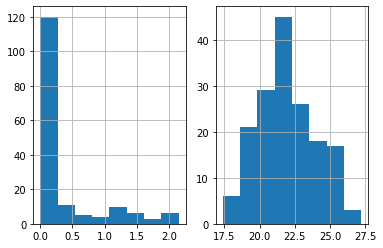

In [22]:
# view data
chm_data = pd.read_csv(out_csv1)
print("CHM data (meters)")
print(chm_data['B0'])
chm_data = chm_data['B0']
#hist1 = chm_data.hist(bins=8)

tir_data = pd.read_csv(out_csv2)
print("TIR data (deg C)")
print(tir_data['B0'])
tir_data = tir_data['B0']
#hist2 = tir_data.hist(bins=8)


fig, axes = pl.subplots(1, 2)
chm_data.hist(bins=8, ax=axes[0])
tir_data.hist(bins=8, ax=axes[1])

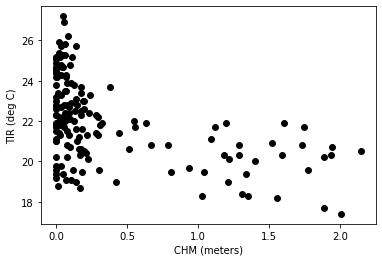

In [24]:
# CHM vs TIR
pl.scatter(chm_data, tir_data, marker='o',s=35, c="black");
pl.xlabel("CHM (meters)")
pl.ylabel("TIR (deg C)")
pl.show()

#pl.scatter(chm_data, tir_data, c="black", s=3, alpha=0.3,
#            cmap='viridis')
#pl.colorbar();  # show color scale